In [3]:
import os
from pathlib import Path
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List all files and get latest
dir_path = Path('/allah/data/parquet/ETH/')
files = os.listdir(dir_path)

feature_files = [f for f in files if 'features' in f and f.endswith('.parquet')]
label_files = [f for f in files if 'labels' in f and f.endswith('.parquet')]

def get_timestamp(filename):
    match = re.search(r'_(\d{8}_\d{6})\.parquet', filename)
    return match.group(1) if match else '00000000_000000'

latest_feature = max(feature_files, key=get_timestamp) if feature_files else None
latest_label = max(label_files, key=get_timestamp) if label_files else None

print(f"\nLatest feature file: {latest_feature}")
print(f"Latest label file: {latest_label}")

# Load the latest files into pandas
raw_features = pd.read_parquet(dir_path / latest_feature)
raw_labels = pd.read_parquet(dir_path / latest_label)

print(f"\nLoaded features shape: {raw_features.shape}")
print(f"Loaded labels shape: {raw_labels.shape}")


Latest feature file: USDT:USDT_raw_features_20250206_184554.parquet
Latest label file: USDT:USDT_raw_labels_20250206_184554.parquet

Loaded features shape: (17721, 1207)
Loaded labels shape: (17721, 1)


In [10]:
raw_features.columns
# print all columns 
print(list(raw_features.columns))


['%-rsi-period_14_ETH/USDTUSDT_1m', '%-mfi-period_14_ETH/USDTUSDT_1m', '%-adx-period_14_ETH/USDTUSDT_1m', '%-plus_di-period_14_ETH/USDTUSDT_1m', '%-minus_di-period_14_ETH/USDTUSDT_1m', '%-cci-period_14_ETH/USDTUSDT_1m', '%-cmo-period_14_ETH/USDTUSDT_1m', '%-mom-period_14_ETH/USDTUSDT_1m', '%-roc-period_14_ETH/USDTUSDT_1m', '%-trix-period_14_ETH/USDTUSDT_1m', '%-willr-period_14_ETH/USDTUSDT_1m', '%-obv-period_14_ETH/USDTUSDT_1m', '%-ad-period_14_ETH/USDTUSDT_1m', '%-adosc-period_14_ETH/USDTUSDT_1m', '%-relative_volume-period_14_ETH/USDTUSDT_1m', '%-atr-period_14_ETH/USDTUSDT_1m', '%-natr-period_14_ETH/USDTUSDT_1m', '%-trange-period_14_ETH/USDTUSDT_1m', '%-dx-period_14_ETH/USDTUSDT_1m', '%-sma-period_14_ETH/USDTUSDT_1m', '%-ema-period_14_ETH/USDTUSDT_1m', '%-tema-period_14_ETH/USDTUSDT_1m', '%-dema-period_14_ETH/USDTUSDT_1m', '%-kama-period_14_ETH/USDTUSDT_1m', '%-trima-period_14_ETH/USDTUSDT_1m', '%-wma-period_14_ETH/USDTUSDT_1m', '%-t3-period_14_ETH/USDTUSDT_1m', '%-stoch_k-period_14_E

In [2]:
raw_labels

,&-target
6169,LOSE
6170,LOSE
6173,LOSE
6174,LOSE
6175,LOSE
...,...
144177,WIN
144178,LOSE
144180,WIN
144181,LOSE


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load feature and label files
features_df = raw_features
labels_df = raw_labels

# Basic analysis
print("Features shape:", features_df.shape)
print("Labels shape:", labels_df.shape)

# Analyze feature statistics
print("\nFeature Statistics:")
print(features_df.describe())

# Look at label distribution
print("\nLabel Distribution:")
print(labels_df['&-target'].value_counts(normalize=True))

# Plot correlation heatmap of features
plt.figure(figsize=(15,10))
feature_cols = [col for col in features_df.columns if '%' in col]
correlation_matrix = features_df[feature_cols].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Plot distributions of some key features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(feature_cols[:6]):  # Plot first 6 features
    sns.histplot(data=features_df, x=col, bins=50, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Check prediction confidence distribution if available
if 'do_predict' in features_df.columns:
    print("\nPrediction Confidence Distribution:")
    print(features_df['do_predict'].value_counts(normalize=True))


Features shape: (17721, 1207)
Labels shape: (17721, 1)

Feature Statistics:
       %-rsi-period_14_ETH/USDTUSDT_1m  %-mfi-period_14_ETH/USDTUSDT_1m  \
count                     17721.000000                     17721.000000   
mean                         50.193593                        49.380056   
std                           4.241162                        13.543435   
min                          22.826777                         8.755502   
25%                          47.537237                        39.485933   
50%                          50.202490                        49.375669   
75%                          52.877195                        59.171632   
max                          70.853217                        89.926903   

       %-adx-period_14_ETH/USDTUSDT_1m  %-plus_di-period_14_ETH/USDTUSDT_1m  \
count                     17721.000000                         17721.000000   
mean                         21.084436                            23.148825   
std        

=== Dataset Overview ===
Features shape: (4859, 1207)
Labels shape: (4859, 1)

Metadata:
{
  "timestamp": "20250204_215049",
  "pair": "ETH/USDT:USDT",
  "features_shape": [
    4859,
    1207
  ],
  "labels_shape": [
    4859,
    1
  ],
  "features_columns": [
    "%-rsi-period_14_ETH/USDTUSDT_1m",
    "%-mfi-period_14_ETH/USDTUSDT_1m",
    "%-adx-period_14_ETH/USDTUSDT_1m",
    "%-plus_di-period_14_ETH/USDTUSDT_1m",
    "%-minus_di-period_14_ETH/USDTUSDT_1m",
    "%-cci-period_14_ETH/USDTUSDT_1m",
    "%-cmo-period_14_ETH/USDTUSDT_1m",
    "%-mom-period_14_ETH/USDTUSDT_1m",
    "%-roc-period_14_ETH/USDTUSDT_1m",
    "%-trix-period_14_ETH/USDTUSDT_1m",
    "%-willr-period_14_ETH/USDTUSDT_1m",
    "%-obv-period_14_ETH/USDTUSDT_1m",
    "%-ad-period_14_ETH/USDTUSDT_1m",
    "%-adosc-period_14_ETH/USDTUSDT_1m",
    "%-relative_volume-period_14_ETH/USDTUSDT_1m",
    "%-atr-period_14_ETH/USDTUSDT_1m",
    "%-natr-period_14_ETH/USDTUSDT_1m",
    "%-trange-period_14_ETH/USDTUSDT_1m",
    "%

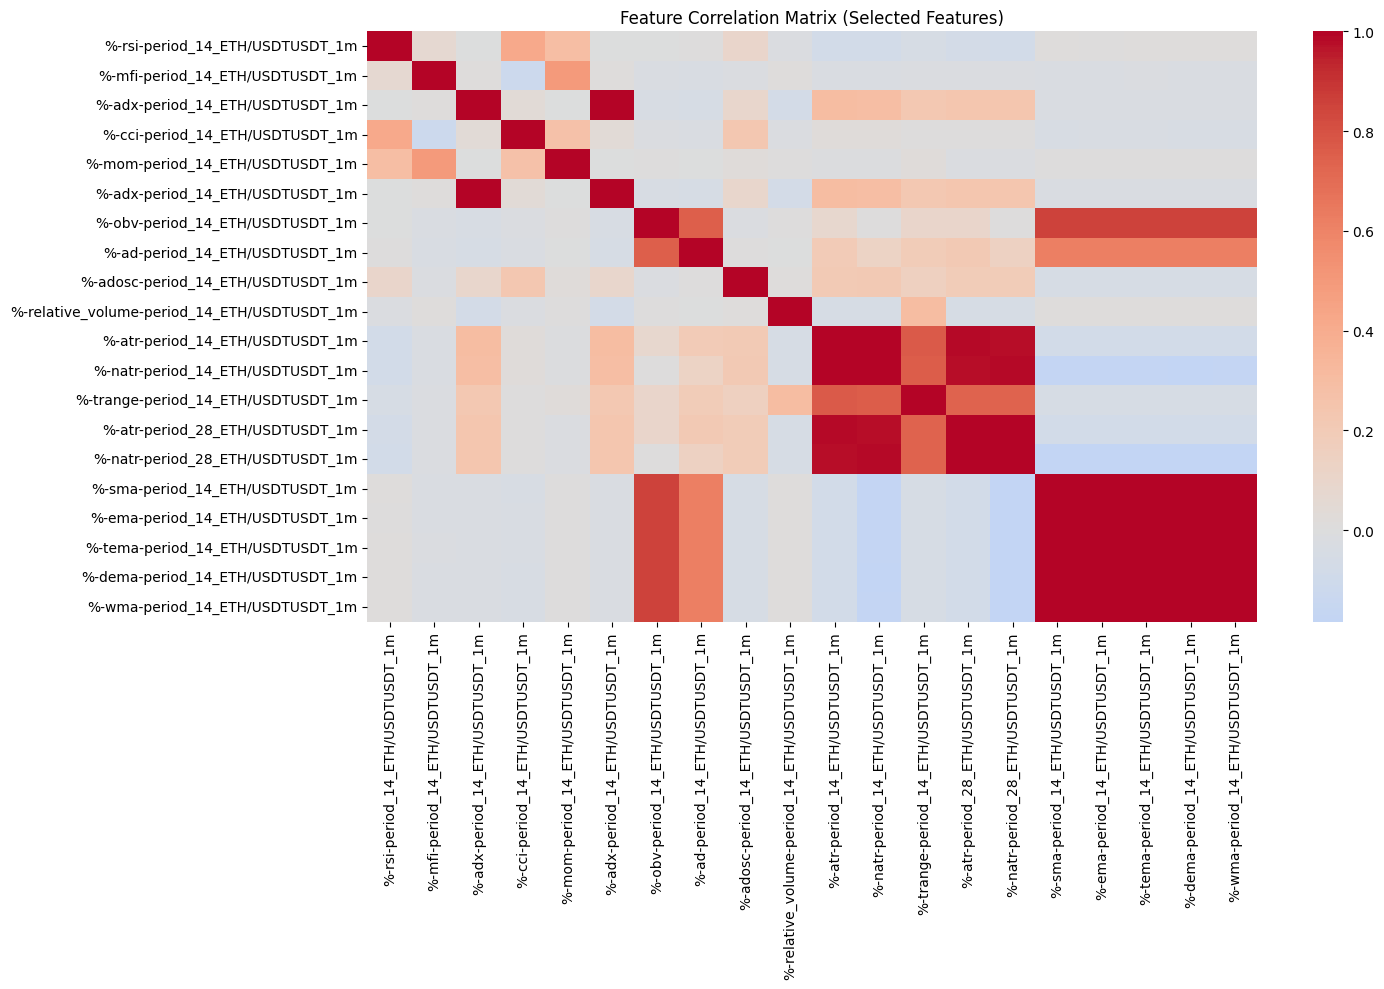


=== Label Analysis ===

Label distribution:
&-target
LOSE    0.642519
WIN     0.357481
Name: proportion, dtype: float64


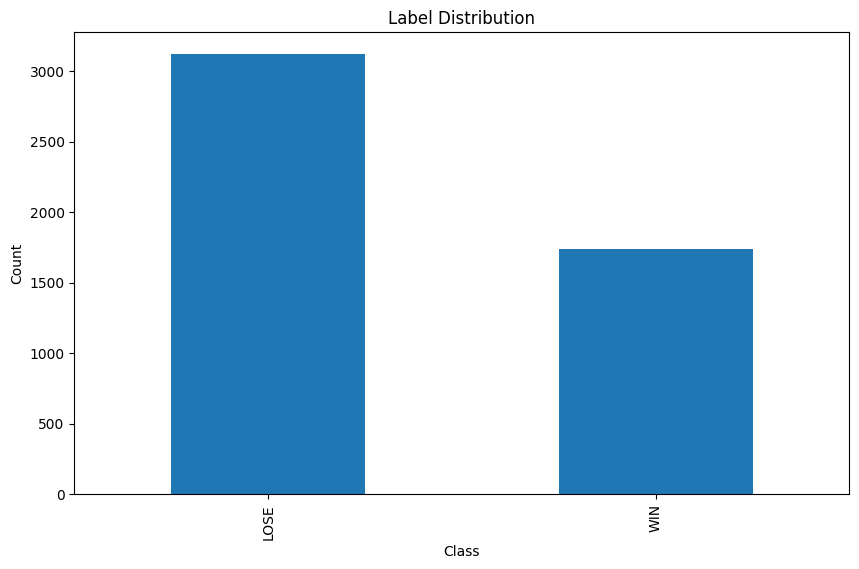


=== Feature Statistics ===

Missing values per group:
momentum: 0 missing values
volume: 0 missing values
volatility: 0 missing values
moving_avg: 0 missing values


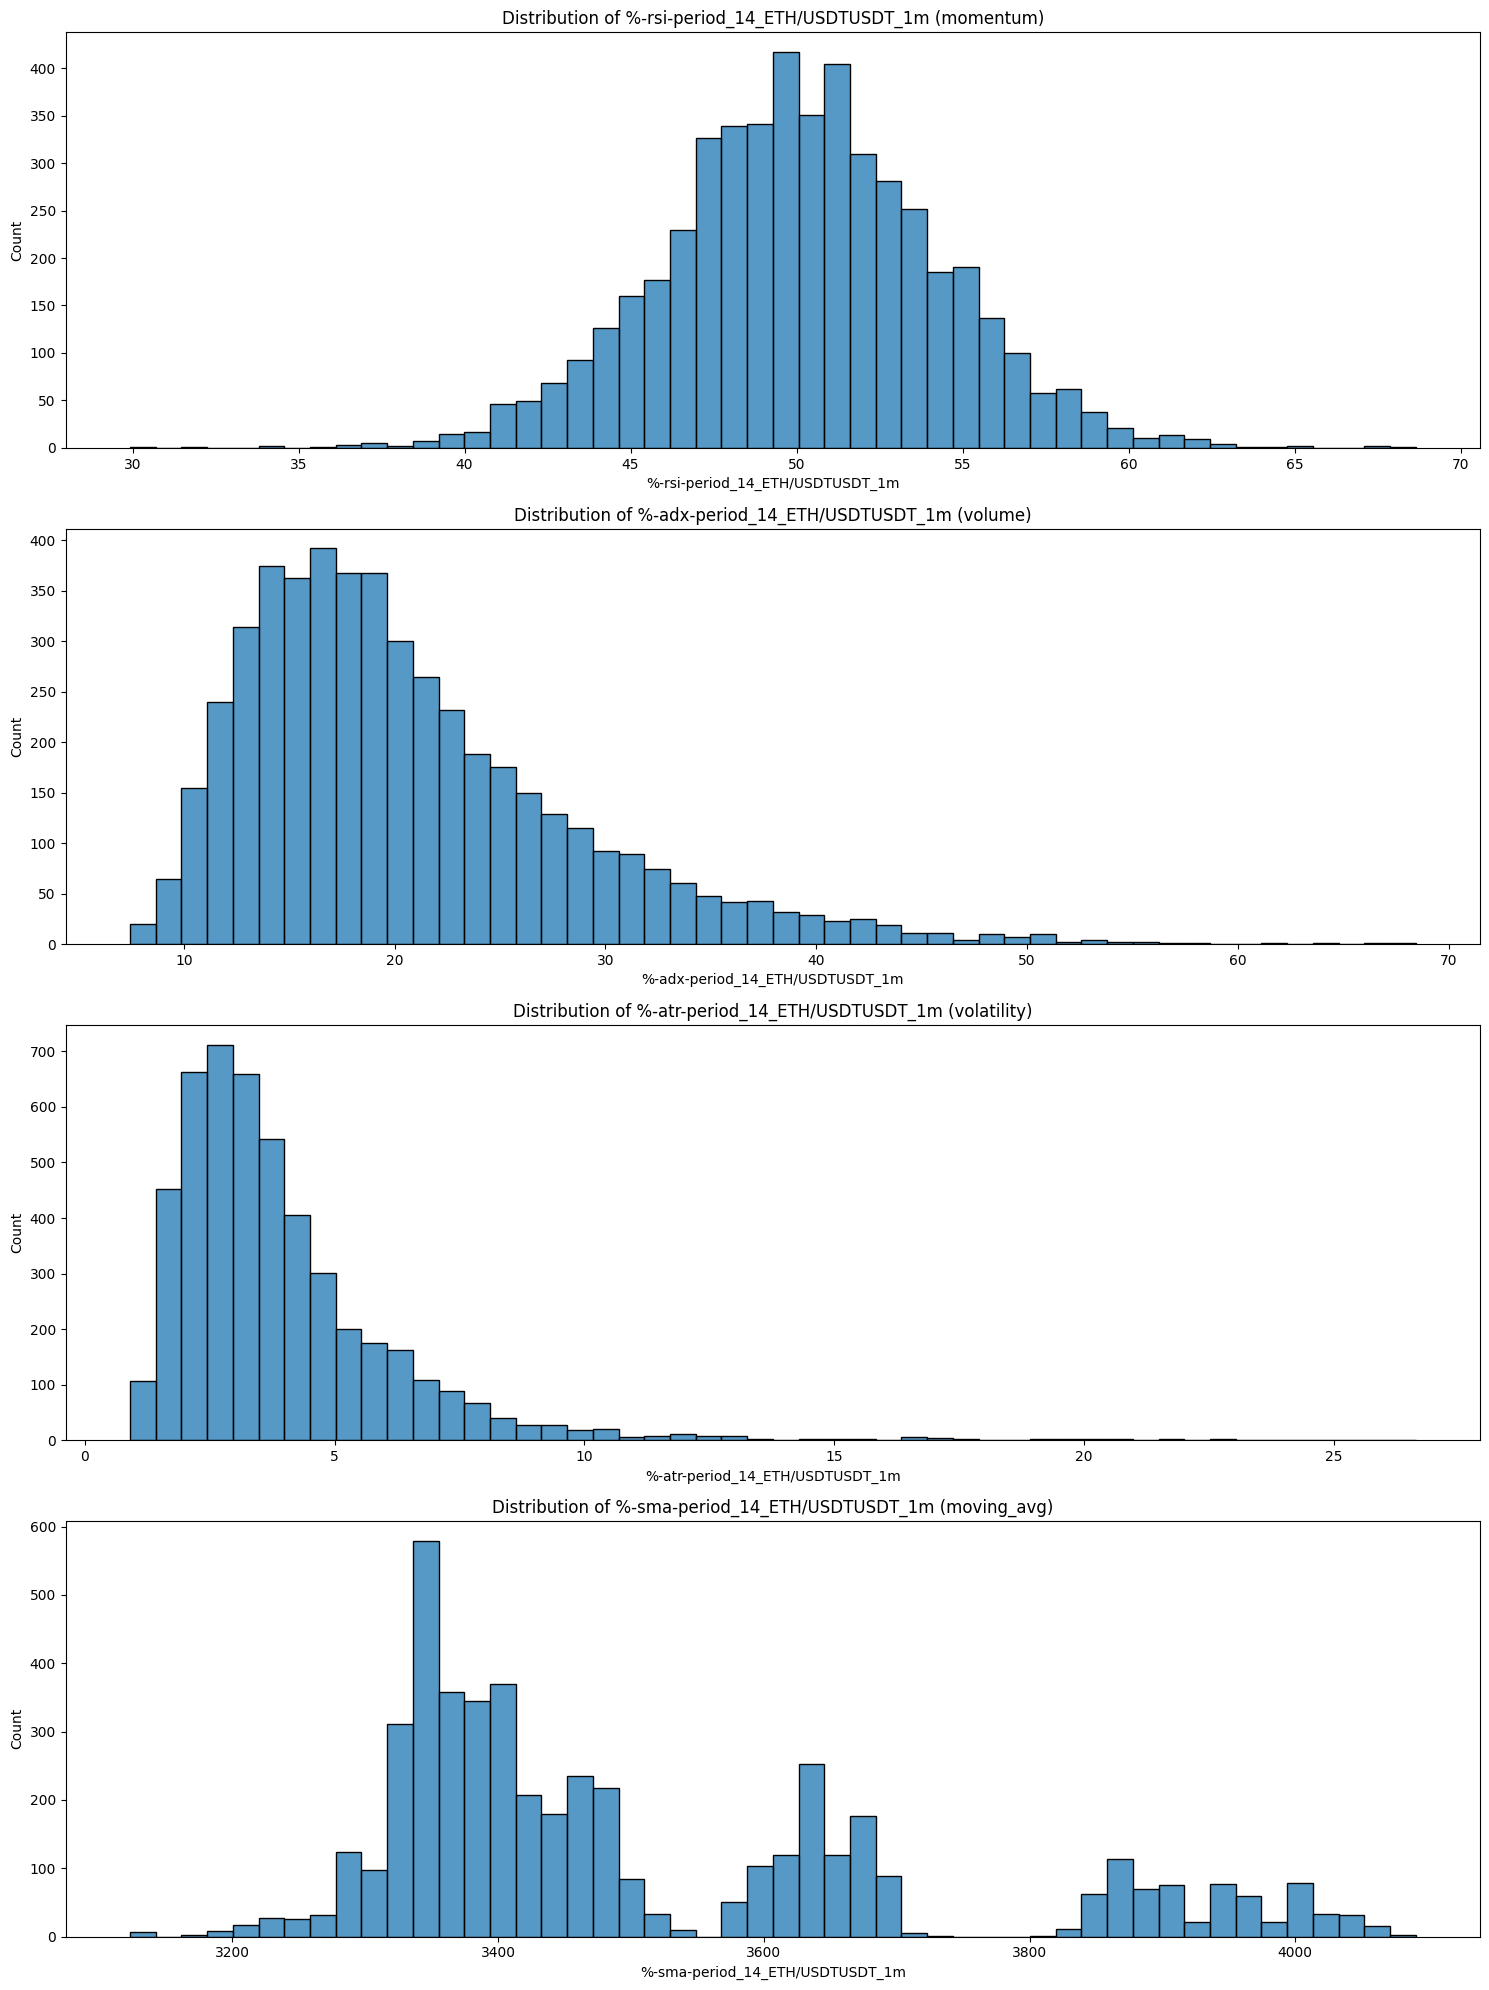


=== Time-based Features ===
Found 7 time-based features:
['%-day_of_week', '%-hour_of_day', '%-minute_of_hour', '%-is_weekend', '%-asian_session', '%-london_session', '%-ny_session']


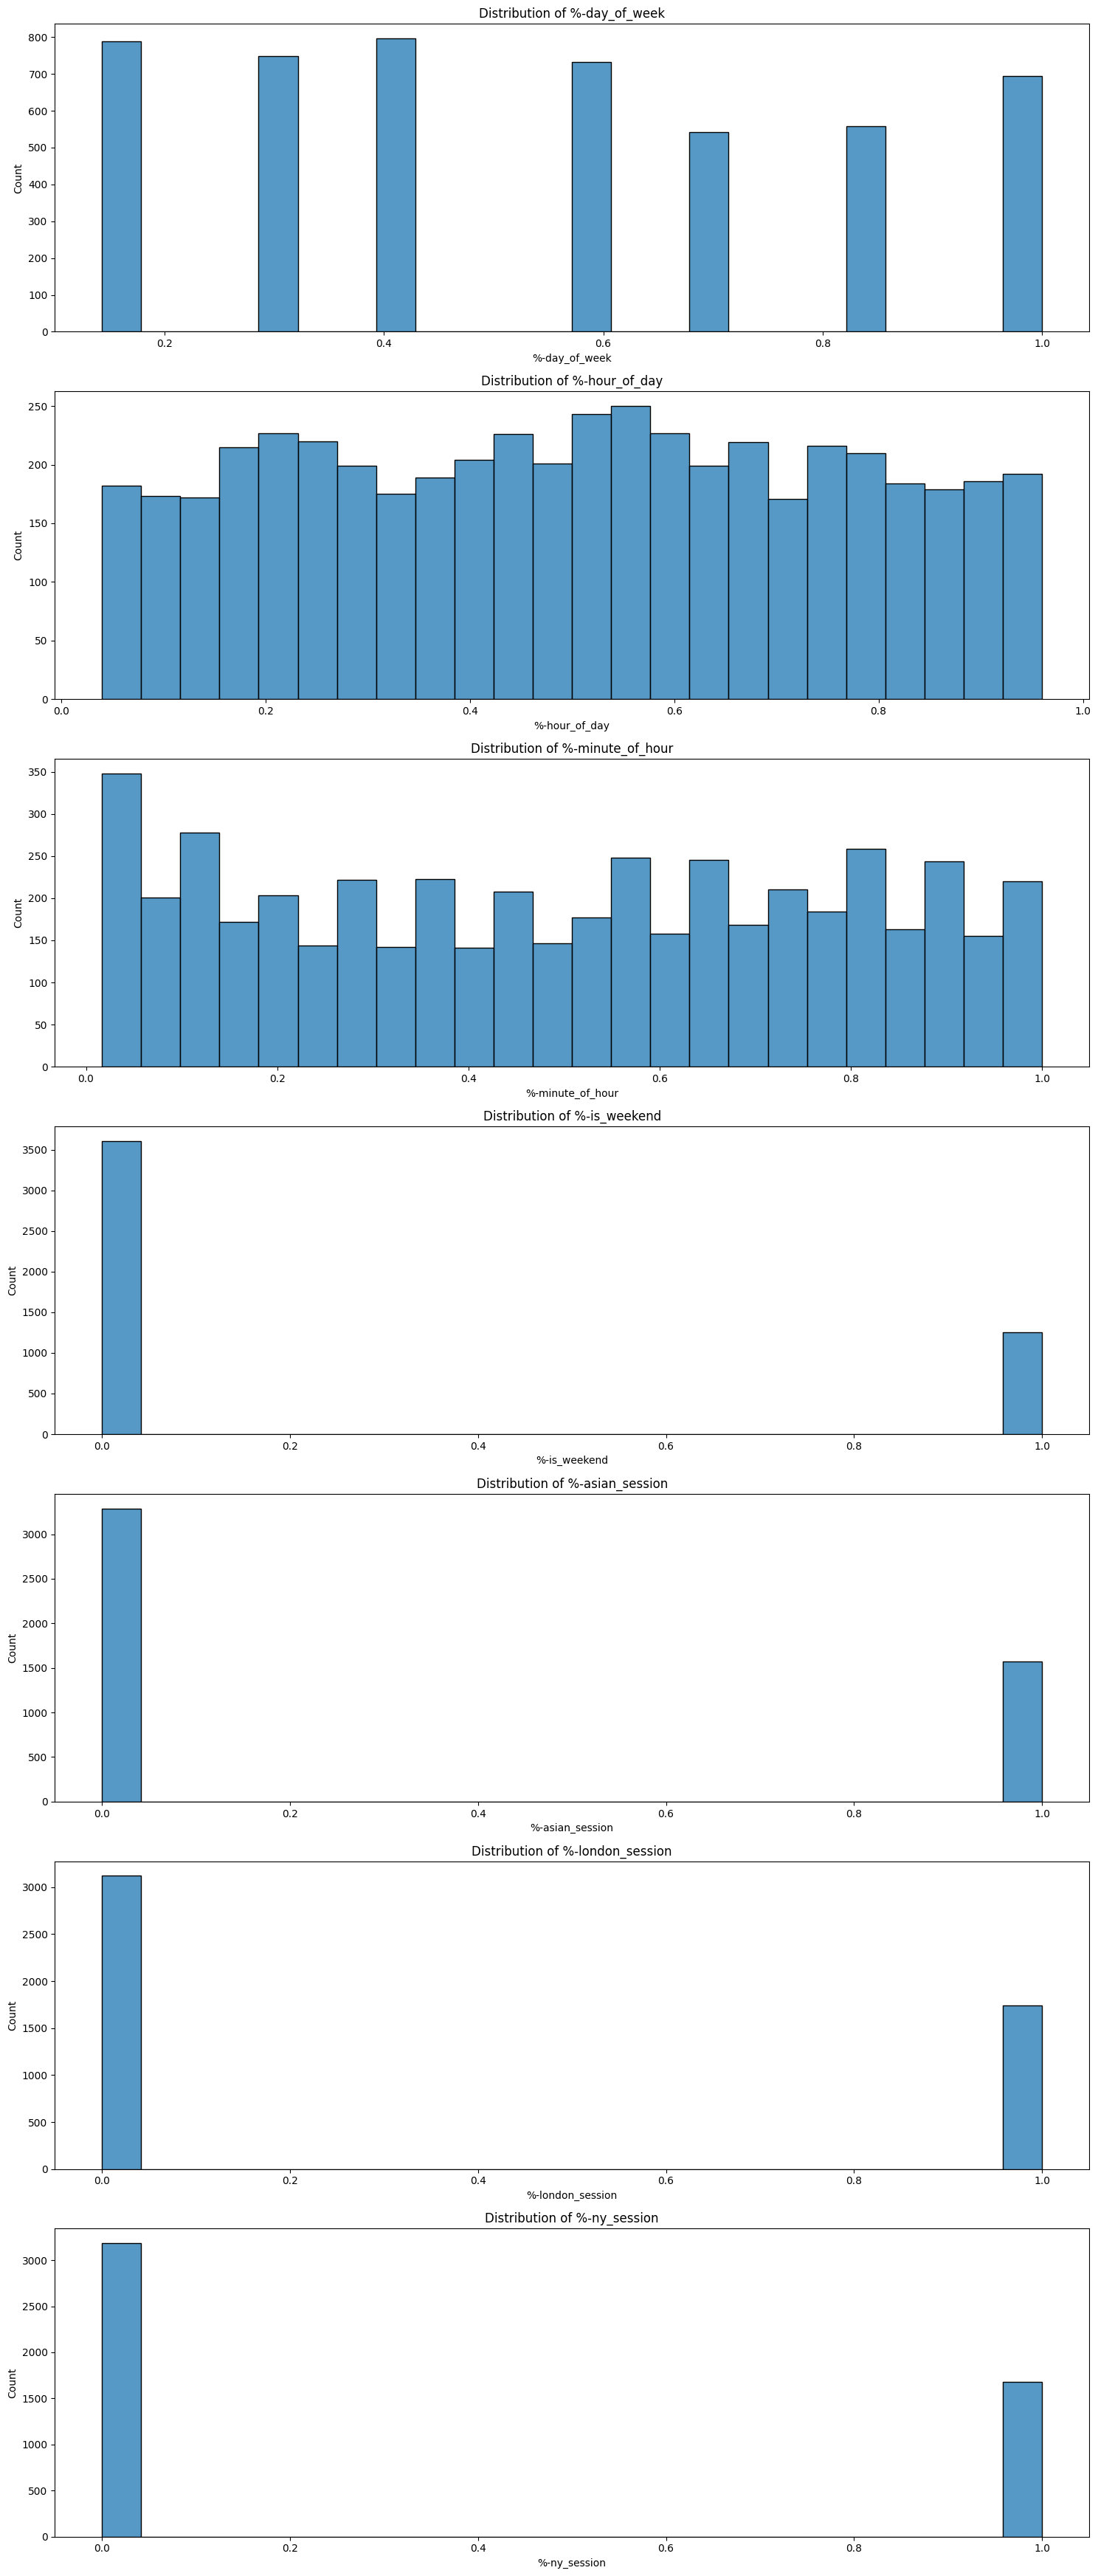


=== Feature Importance Analysis ===

Top 10 features by correlation with target:
%-natr-period_14_shift-3_ETH/USDTUSDT_1m: 0.0857
%-natr-period_14_shift-2_ETH/USDTUSDT_1m: 0.0855
%-natr-period_28_ETH/USDTUSDT_1m: 0.0854
%-natr-period_28_shift-2_ETH/USDTUSDT_1m: 0.0854
%-natr-period_28_shift-3_ETH/USDTUSDT_1m: 0.0854
%-natr-period_14_ETH/USDTUSDT_1m: 0.0854
%-natr-period_28_shift-1_ETH/USDTUSDT_1m: 0.0851
%-natr-period_14_shift-1_ETH/USDTUSDT_1m: 0.0849
%-bb_width-period_100_shift-3_ETH/USDTUSDT_1m: 0.0843
%-bb_width-period_100_shift-2_ETH/USDTUSDT_1m: 0.0840

Analysis report saved to analysis_report.json


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# 1. Basic Information
print("=== Dataset Overview ===")
print(f"Features shape: {raw_features.shape}")
print(f"Labels shape: {raw_labels.shape}")
print("\nMetadata:")
print(json.dumps(metadata, indent=2))

# 2. Feature Analysis
print("\n=== Feature Analysis ===")

# Group features by type
feature_groups = {
    'momentum': [col for col in raw_features.columns if any(x in col.lower() for x in ['rsi', 'mfi', 'adx', 'cci', 'mom'])],
    'volume': [col for col in raw_features.columns if any(x in col.lower() for x in ['volume', 'obv', 'ad'])],
    'volatility': [col for col in raw_features.columns if any(x in col.lower() for x in ['atr', 'natr', 'trange'])],
    'moving_avg': [col for col in raw_features.columns if any(x in col.lower() for x in ['sma', 'ema', 'tema', 'wma'])]
}

# Print feature counts by group
print("\nFeature counts by group:")
for group, features in feature_groups.items():
    print(f"{group}: {len(features)} features")

# 3. Correlation Analysis
plt.figure(figsize=(15, 10))
# Select a subset of features for better visualization
selected_features = []
for group in feature_groups.values():
    if group:
        selected_features.extend(group[:5])  # Take first 5 features from each group

correlation_matrix = raw_features[selected_features].corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Matrix (Selected Features)')
plt.tight_layout()
plt.show()

# 4. Label Distribution
print("\n=== Label Analysis ===")
print("\nLabel distribution:")
print(raw_labels['&-target'].value_counts(normalize=True))

plt.figure(figsize=(10, 6))
raw_labels['&-target'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 5. Feature Statistics
print("\n=== Feature Statistics ===")
print("\nMissing values per group:")
for group, features in feature_groups.items():
    if features:
        missing = raw_features[features].isnull().sum().sum()
        print(f"{group}: {missing} missing values")

# 6. Feature Distributions
fig, axes = plt.subplots(len(feature_groups), 1, figsize=(15, 5*len(feature_groups)))
for idx, (group, features) in enumerate(feature_groups.items()):
    if features:
        # Select first feature from each group
        feature = features[0]
        sns.histplot(data=raw_features, x=feature, bins=50, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature} ({group})')
plt.tight_layout()
plt.show()

# 7. Time-based Features Analysis (if available)
time_features = [col for col in raw_features.columns if any(x in col.lower() 
                for x in ['hour', 'day', 'week', 'month', 'session'])]
if time_features:
    print("\n=== Time-based Features ===")
    print(f"Found {len(time_features)} time-based features:")
    print(time_features)
    
    # Plot time feature distributions
    fig, axes = plt.subplots(len(time_features), 1, figsize=(15, 5*len(time_features)))
    if len(time_features) == 1:
        axes = [axes]
    for idx, feature in enumerate(time_features):
        sns.histplot(data=raw_features, x=feature, bins=24, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# 8. Feature Importance (using correlation with target)
if '&-target' in raw_labels.columns:
    print("\n=== Feature Importance Analysis ===")
    # Convert target to numeric if it's categorical
    target = pd.factorize(raw_labels['&-target'])[0]
    
    # Calculate correlation with target
    correlations = []
    for feature in raw_features.columns:
        if raw_features[feature].dtype in ['float64', 'int64']:
            corr = np.corrcoef(raw_features[feature].fillna(0), target)[0,1]
            correlations.append((feature, abs(corr)))
    
    # Sort and display top correlations
    correlations.sort(key=lambda x: x[1], reverse=True)
    print("\nTop 10 features by correlation with target:")
    for feature, corr in correlations[:10]:
        print(f"{feature}: {corr:.4f}")

# 9. Save Analysis Report
report = {
    "dataset_info": {
        "n_samples": len(raw_features),
        "n_features": len(raw_features.columns),
        "n_labels": len(raw_labels),
        "feature_groups": {group: len(features) for group, features in feature_groups.items()},
        "label_distribution": raw_labels['&-target'].value_counts().to_dict(),
        "top_correlated_features": correlations[:10]
    }
}

# Save report
with open('/allah/data/parquet/ETH/analysis_report.json', 'w') as f:
    json.dump(report, f, indent=2)

print("\nAnalysis report saved to analysis_report.json")

In [ ]:
features_df.head()

In [ ]:
# give the head of the features and labels
features_df.columns